In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1 
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = GreenNN()
model.build(loadPath = "savedModels/laplace")

In [13]:
%%time
cheb2prefs = Chebpy2Preferences()
cheb2prefs.prefx.eps = 1e-6
cheb2prefs.prefx.eps = 1e-6
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs, simplify = False)

CPU times: user 118 ms, sys: 62.1 ms, total: 180 ms
Wall time: 179 ms


In [14]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     47       [-0.000 -0.000 -0.000 -0.000]
vertical scale = 0.247264

0.2472595


(0.0, 1.0)

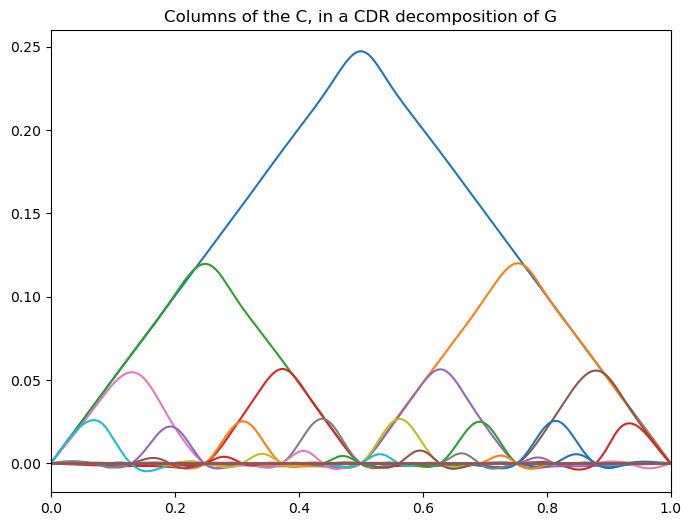

In [15]:
i = slice(0,-1)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [16]:
%%time
u,s,v = g.svd()

CPU times: user 452 ms, sys: 345 ms, total: 796 ms
Wall time: 224 ms


In [30]:
import glob

In [29]:
print(platform.uname().system)

Darwin


1.0623166721910315


(0.0, 1.0)

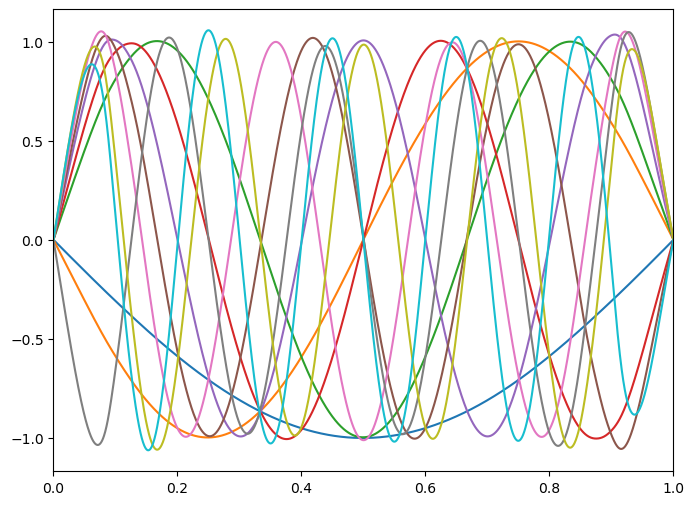

In [19]:
i = slice(0,10)
fig = plt.figure(figsize = (8,6))
u[:,i].plot()
print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [8]:
u[0,:i]

array([ 2.86170171e-09, -6.90082895e-08, -2.55785866e-08,  1.08526623e-08,
        1.62269947e-07,  5.14924461e-08, -4.48791895e-08, -1.28662949e-08,
       -1.37287405e-07,  5.37682010e-09,  3.35475283e-08, -5.59187714e-08,
        4.55238514e-09, -1.12078397e-07,  1.20715967e-07,  1.87414061e-07,
       -2.24845631e-07,  2.74566649e-07, -4.56408300e-07, -7.84385183e-07,
        1.88139306e-07, -4.53648747e-07])

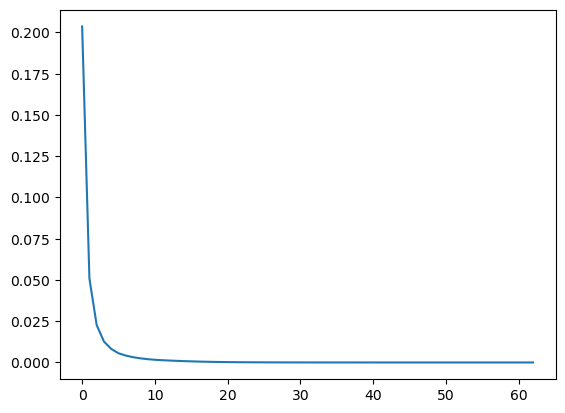

In [9]:
plt.figure()
plt.plot(s)

In [10]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 1.52 s, sys: 284 ms, total: 1.81 s
Wall time: 2.18 s


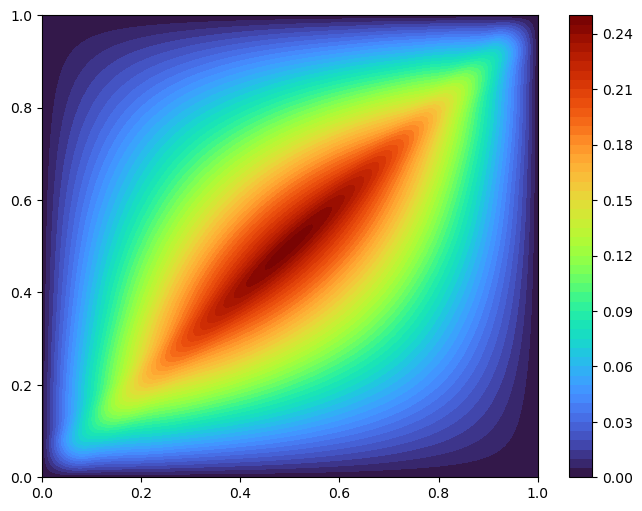

In [11]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 2.65 s, sys: 1.45 s, total: 4.1 s
Wall time: 1.54 s


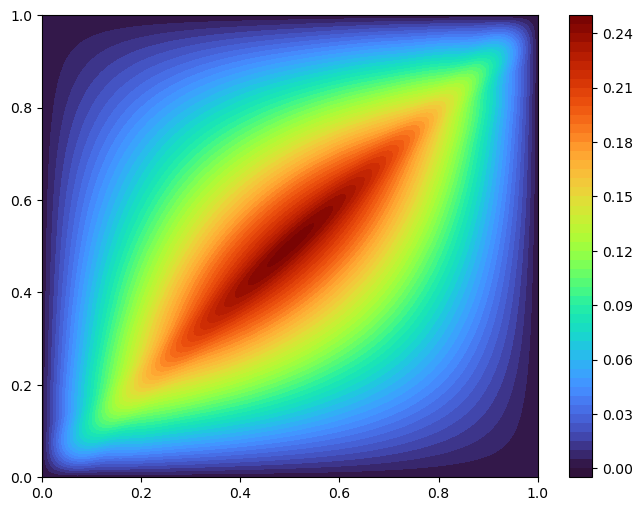

In [14]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)